This notebook justifies ARIMA / SARIMA mathematically.

Goal of this notebook
 - Break series into Trend / Seasonality / Residual
 - Prove non-stationarity
 - Decide differencing order (d, D)

In [36]:
import statsmodels
statsmodels.__version__

'0.14.6'

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [38]:
df = pd.read_csv("data/cleaned_walmart.csv", parse_dates=['Date'])

store_df = df[df['Store'] == 1]

ts = (
    store_df
    .groupby('Date')['Weekly_Sales']
    .sum()
)

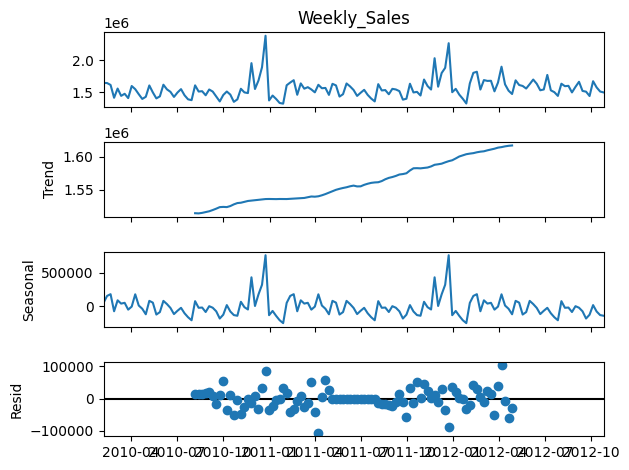

In [39]:
# Decomposition (Additive)

decomposition = seasonal_decompose(ts, model='additive', period=52)

decomposition.plot()
plt.show()

The decomposition reveals a clear trend component and repeating seasonal patterns, confirming the presence of seasonality.

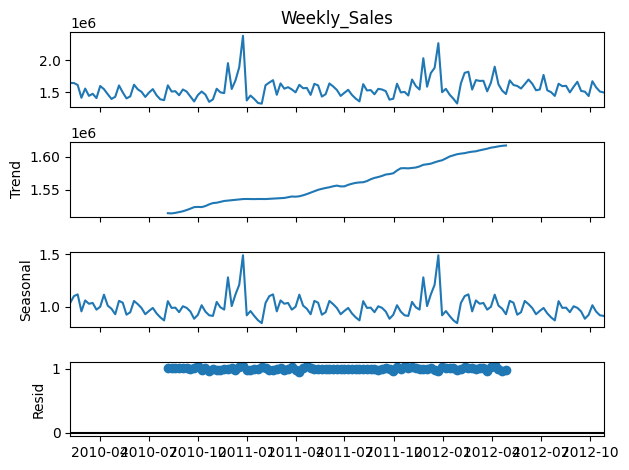

In [40]:
# Multiplicative Decomposition

decomposition_mul = seasonal_decompose(ts, model='multiplicative', period=52)

decomposition_mul.plot()
plt.show()

Multiplicative decomposition better captures increasing seasonal amplitude with rising demand.

In [41]:
# ADF Test (Stationarity Check)

ts = (
    store_df
    .groupby('Date')['Weekly_Sales']
    .sum()
)

adf_test(ts)


ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056


Interpretation:
p-value > 0.05 → Non-stationary
p-value ≤ 0.05 → Stationary

Expect non-stationary.

In [42]:
ts_diff = ts.diff().dropna()

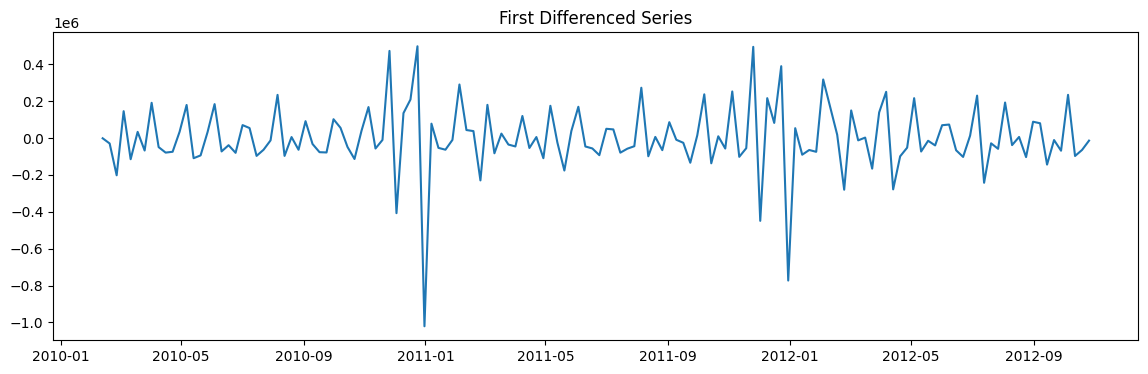

In [43]:
plt.figure(figsize=(14,4))
plt.plot(ts_diff)
plt.title("First Differenced Series")
plt.show()

In [44]:
adf_test(ts_diff.dropna())

ADF Statistic: -7.261575374002524
p-value: 1.6761796699229355e-10
Critical Value (1%): -3.480118600110386
Critical Value (5%): -2.8833618426136196
Critical Value (10%): -2.578407034974382


After first-order differencing, the series becomes stationary, indicating d = 1.

In [45]:
# Seasonal Differencing 

ts_seasonal_diff = ts.diff(52).dropna()

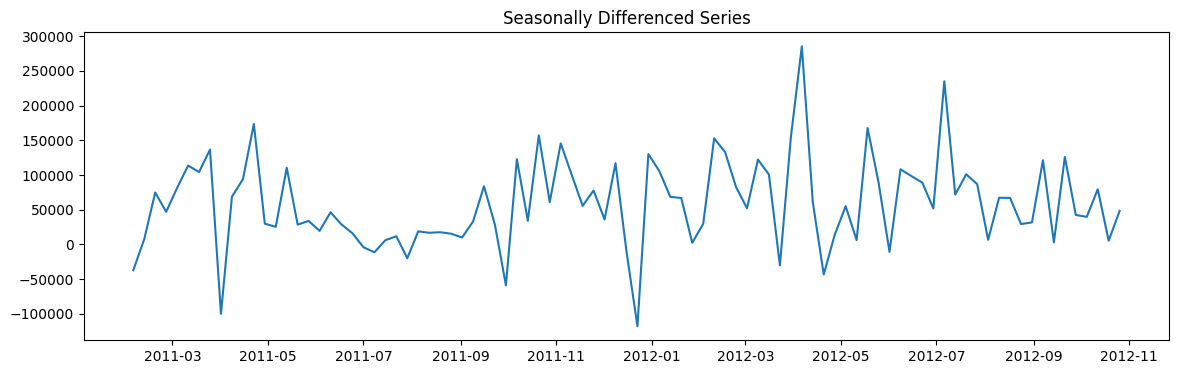

In [46]:
plt.figure(figsize=(14,4))
plt.plot(ts_seasonal_diff)
plt.title("Seasonally Differenced Series")
plt.show()

In [48]:
# Original series
adf_test(ts)

# First difference
ts_diff = ts.diff().dropna()

# Differenced series
adf_test(ts_diff)

ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
ADF Statistic: -7.261575374002524
p-value: 1.6761796699229355e-10
Critical Value (1%): -3.480118600110386
Critical Value (5%): -2.8833618426136196
Critical Value (10%): -2.578407034974382


Seasonal differencing removes periodic patterns, confirming seasonal order D = 1.

In [50]:
# Original
adf_test(ts)

# First difference
ts_diff = ts.diff().dropna()
adf_test(ts_diff)

# Seasonal difference (weekly data → yearly seasonality = 52)
ts_seasonal_diff = ts_diff.diff(52).dropna()

# ADF on seasonal differenced series
adf_test(ts_seasonal_diff)

ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
ADF Statistic: -7.261575374002524
p-value: 1.6761796699229355e-10
Critical Value (1%): -3.480118600110386
Critical Value (5%): -2.8833618426136196
Critical Value (10%): -2.578407034974382
ADF Statistic: -7.083154722894864
p-value: 4.6103906990707446e-10
Critical Value (1%): -3.510711795769895
Critical Value (5%): -2.8966159448223734
Critical Value (10%): -2.5854823866213152


In [51]:
print(type(ts_seasonal_diff))
print(ts_seasonal_diff.head())

<class 'pandas.Series'>
Date
2011-02-11    44718.81
2011-02-18    67217.12
2011-02-25   -27801.92
2011-03-04    34384.04
2011-03-11    32193.31
Name: Weekly_Sales, dtype: float64


<Figure size 1200x400 with 0 Axes>

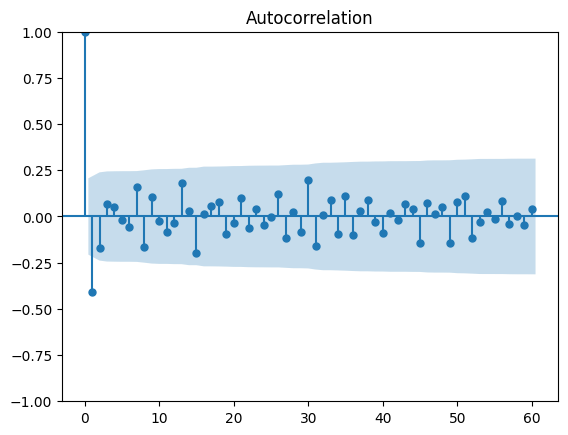

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 60 must be < 45.

<Figure size 1200x400 with 0 Axes>

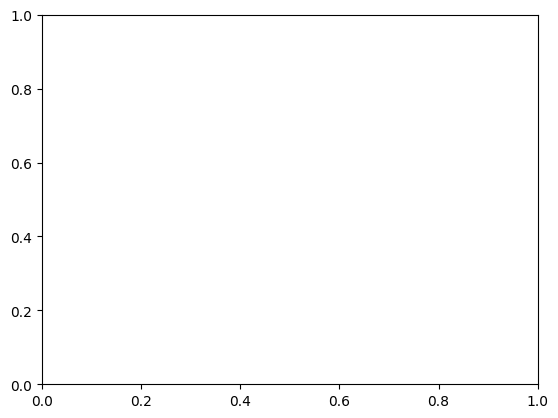

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(ts_seasonal_diff, lags=60)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(ts_seasonal_diff, lags=60, method='ywm')
plt.show()


<Figure size 1200x400 with 0 Axes>

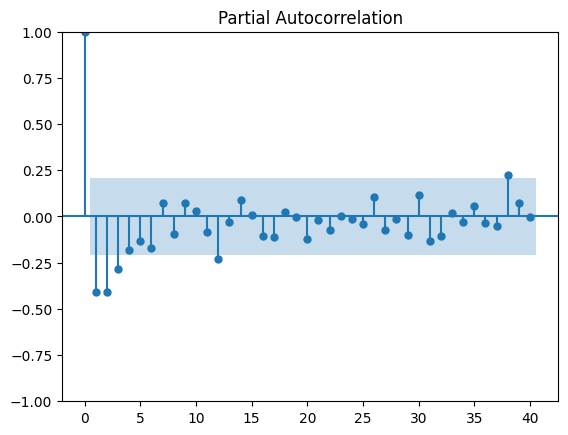

In [53]:
plt.figure(figsize=(12,4))
plot_pacf(ts_seasonal_diff, lags=40, method='ywm')
plt.show()

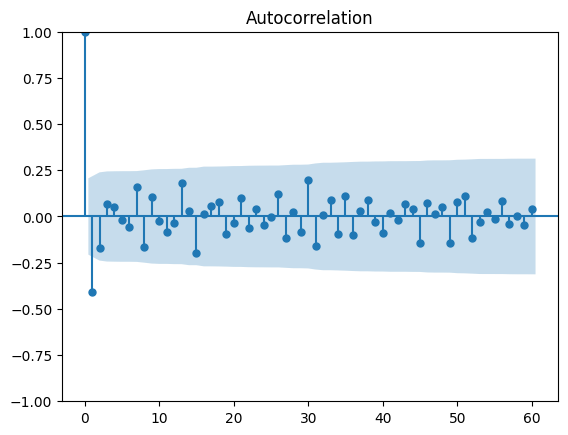

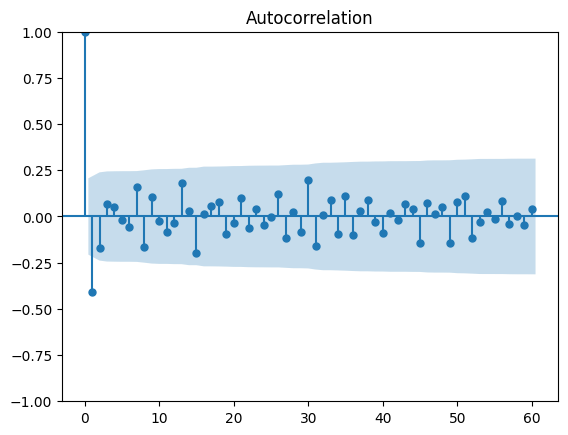

In [54]:
plot_acf(ts_seasonal_diff, lags=60)